In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from data_locator import *
import numpy as np
from input_file_extraction import *

In [37]:
directory_path = os.path.join('Examples','R_L_test_difficult_SIMULATIONS','Simulation0_SIM_SIMULATIONS')
molecules, _= read_input_file(directory_path)

path, _ = data_file_finder(directory_path, ['viewer_files'], run = 0)

with open(path, "r") as f:
    lines = f.readlines()

In [38]:
colors_and_sites = []
used_sites = []

for molecule in molecules:
    for line in molecule:
        if line[0:4] == 'TYPE':
            color = line.split()[8]
            type = line.split()[2][1:-1]
            moleclue_name = molecule[0].split()[1][1:-1]
            if color not in (item[0] for item in colors_and_sites):
                colors_and_sites.append([color, [[moleclue_name, type]]])
                used_sites.append([moleclue_name, type])
            elif [moleclue_name, type] not in used_sites:
                for i, item in enumerate(colors_and_sites):
                    if item[0] == color:
                        colors_and_sites[i][1].append([moleclue_name, type])
                used_sites.append([moleclue_name, type])
            else:
                pass

In [39]:
split_file = []
times = []
current_list = []

for line in lines:
    if line == 'SCENE\n':
        split_file.append(current_list)
        current_list = []
    if line[0:2] == 'ID':
        current_list.append(line.strip()[3:])
    if line[0:11] == 'SceneNumber':
        times.append(line.split('\t')[3][:-1])
split_file.append(current_list)
_ = split_file.pop(0)

In [40]:
for i, scene in enumerate(split_file):
    for j, row in enumerate(scene):
        split_file[i][j] = row.split('\t')

In [41]:
data_frame_list = []

column_list = ['ID', 'Unknown', 'Color', 'X', 'Y', 'Z']

for scene in split_file:
    data_frame_list.append(pd.DataFrame(scene, columns=column_list))

In [42]:
def average_Z(df, color):
    color_df = df[df['Color'] == color]
    return color_df['Z'].astype(float).mean()

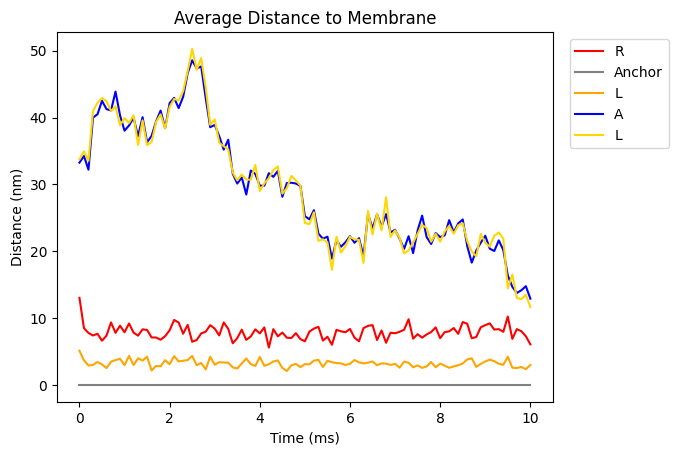

In [43]:
verbose = False

color_list = list(data_frame_list[0]['Color'].unique())

z_values = []

for color in color_list:
    line = []
    for data_frame in data_frame_list:
        line.append(average_Z(data_frame,color))
    z_values.append([color, line])

for line in z_values:
    plt.plot([float(time)*1000 for time in times], line[1], color=line[0].replace('_','').lower())

plt.title('Average Distance to Membrane')
plt.xlabel('Time (ms)')
plt.ylabel('Distance (nm)')

legend_list = []

for color in color_list:
    for color_and_site in colors_and_sites:
        if color == color_and_site[0]:
            legend_entry = ''
            for site in color_and_site[1]:
                if verbose:
                    legend_entry = legend_entry + f'Site {site[1]} of {site[0]}, '
                else:
                    legend_entry = legend_entry + f'{site[1]}, '
            legend_list.append(legend_entry[:-2])

plt.legend(legend_list, bbox_to_anchor=(1.02, 1), loc='upper left')

plt.show()